In [1]:
from biocrnpyler import *
import pylab as plt
import pandas as pd
import numpy as np

data_file = "basic-parts-biocrnpyler-translator - Parts List.tsv"

df = pd.read_csv(data_file, sep='\t')

df.loc[:, ['Part Type']].to_numpy()

#Dictionary to convert Part Types to BioCRNpyler classes
type_to_class = {
    'CDS':[CDS],
    'RBS':[RBS],
    'Terminator-ConstituitivePromoter':[Terminator, Promoter],
    'Terminator-RegulatedPromoter':[Terminator, RegulatedPromoter],
    'Linker':[],
    'Backbone':[DNA_part]
}


def backbone_concentration(s):
    if "BASIC_SEVA_36" in str(s) or "BASIC_SEVA_26" in str(s):
        return .001
    elif "BASIC_SEVA_28" in str(s):
        return .05
    else:
        return .01

In [2]:
#Constructs:
c1 = ["BASIC_SEVA_26", "LMP", "Terminator1_J23101_RiboA", "UTR1-RBS3", "sfGFP", "LMS"]
c2 = ["BASIC_SEVA_26", "LMP", "Terminator2_LacI_RiboB", "UTR1-RBS3", "mCherry", "LMS"]
c3 = ["BASIC_SEVA_36", "LMP", "Terminator1_J23101_RiboA", "UTR1-RBS2", "sfGFP", "UTR2-RBS1", "mTagBFP2", "UTR3-RBS1", "mCherry", "LMS"]
c4 = ["BASIC_SEVA_26", "LMP", "Terminator1_TetR_RiboA", "UTR1-RBS2", "LacI", "UTR2-RBS2", "sfGFP", "L1", "Terminator2_LacI_RiboB", "UTR3-RBS2", "TetR", "LMS"]
c5 = ["BASIC_SEVA_37_CmR-p15A.1", "LMP", "Terminator1_J23104_RiboA", "UTR2-RBS1", "mTagBFP2", "UTR3-RBS3", "mCherry", "UTR1-RBS3", "sfGFP", "LMS"]

basic_constructs = [c1, c2, c3, c4, c5]

In [3]:
biocrnpyler_constructs = []
for c in basic_constructs:
    print(c)
    bc_list = []
    for p in c:
        pt = df.loc[df['Part Name'] == p]['Part Type'].to_string(index = False)
        keywords = df.loc[df['Part Name'] == p]['BioCRNpyler Args'].to_string(index = False)
        try:
            class_list = type_to_class[pt]
            if keywords != "NaN":
                exec("D = {"+keywords+"}")
                
                name = p.replace("-", "_")
                #print(p, pt, keywords)
                for C in class_list:
                    if "Terminator" in pt and C == Terminator:
                        D['name'] = name.split("_")[0]
                    elif "Terminator" in pt and C != Terminator:
                         D['name'] = "_".join(name.split("_")[1:])
                    else:
                        D['name'] = name
                    part = C(**D)
                    bc_list.append(part)
                    #print("\t", part)
        
        except KeyError:
            print("Unknown Part Type", p, pt)
    
    print(c, bc_list)
    biocrnpyler_constructs.append(bc_list)


['BASIC_SEVA_26', 'LMP', 'Terminator1_J23101_RiboA', 'UTR1-RBS3', 'sfGFP', 'LMS']
['BASIC_SEVA_26', 'LMP', 'Terminator1_J23101_RiboA', 'UTR1-RBS3', 'sfGFP', 'LMS'] [BASIC_SEVA_26, Terminator1, J23101_RiboA, UTR1_RBS3, sfGFP]
['BASIC_SEVA_26', 'LMP', 'Terminator2_LacI_RiboB', 'UTR1-RBS3', 'mCherry', 'LMS']
['BASIC_SEVA_26', 'LMP', 'Terminator2_LacI_RiboB', 'UTR1-RBS3', 'mCherry', 'LMS'] [BASIC_SEVA_26, Terminator2, LacI_RiboB, UTR1_RBS3, mCherry]
['BASIC_SEVA_36', 'LMP', 'Terminator1_J23101_RiboA', 'UTR1-RBS2', 'sfGFP', 'UTR2-RBS1', 'mTagBFP2', 'UTR3-RBS1', 'mCherry', 'LMS']
['BASIC_SEVA_36', 'LMP', 'Terminator1_J23101_RiboA', 'UTR1-RBS2', 'sfGFP', 'UTR2-RBS1', 'mTagBFP2', 'UTR3-RBS1', 'mCherry', 'LMS'] [BASIC_SEVA_36, Terminator1, J23101_RiboA, UTR1_RBS2, sfGFP, UTR2_RBS1, mTagBFP2, UTR3_RBS1, mCherry]
['BASIC_SEVA_26', 'LMP', 'Terminator1_TetR_RiboA', 'UTR1-RBS2', 'LacI', 'UTR2-RBS2', 'sfGFP', 'L1', 'Terminator2_LacI_RiboB', 'UTR3-RBS2', 'TetR', 'LMS']
['BASIC_SEVA_26', 'LMP', 'Termin

[BASIC_SEVA_26, Terminator1, J23101_RiboA, UTR1_RBS3, sfGFP]
DNA_construct = BASIC_SEVA_26_Terminator1_J23101_RiboA_UTR1_RBS3_sfGFP_o dna_dna_BASIC_SEVA_26_forward_dna_Terminator1_forward_dna_J23101_RiboA_forward_dna_UTR1_RBS3_forward_dna_sfGFP_forward_circular_
Species(N = 3) = {
protein[sfGFP] (@ 0),  rna[rna[UTR1_RBS3-forward]:rna[sfGFP-forward]:rna[BASIC_SEVA_26-forward]:rna[Terminator1-forward]] (@ 0),  dna[dna[BASIC_SEVA_26-forward]:dna[Terminator1-forward]:dna[J23101_RiboA-forward]:dna[UTR1_RBS3-forward]:dna[sfGFP-forward](circular)] (@ 0),  
}

Reactions (5) = [
0. dna[dna[BASIC_SEVA_26-forward]:dna[Terminator1-forward]:dna[J23101_RiboA-forward]:dna[UTR1_RBS3-forward]:dna[sfGFP-forward](circular)] --> dna[dna[BASIC_SEVA_26-forward]:dna[Terminator1-forward]:dna[J23101_RiboA-forward]:dna[UTR1_RBS3-forward]:dna[sfGFP-forward](circular)]+rna[rna[UTR1_RBS3-forward]:rna[sfGFP-forward]:rna[BASIC_SEVA_26-forward]:rna[Terminator1-forward]]
1. rna[rna[UTR1_RBS3-forward]:rna[sfGFP-forward

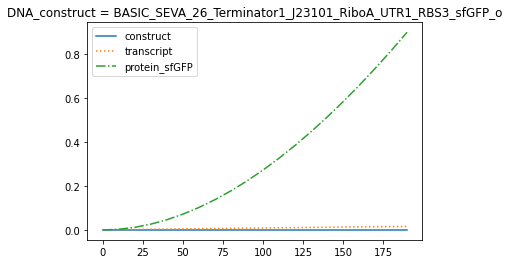

In [4]:
timepoints = np.arange(0, 200, 10)

cl = biocrnpyler_constructs[0]
print(cl)
construct = DNA_construct(cl, circular = True)
print(construct, construct.get_species())

M = SimpleTxTlDilutionMixture("simple model", components = [construct], parameter_file = "default_parameters.txt")
CRN = M.compile_crn()

initial_concentration = {construct.get_species(): backbone_concentration(construct.get_species())}
R = CRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = initial_concentration)

print(CRN.pretty_print(show_rates = False))
plt.figure()
plt.title(str(construct))
for s in CRN.species:
    if s == construct.get_species():
        label = "construct"
        ls = "-"
    elif "rna" in str(s):
        label = "transcript"
        ls = ":"
    elif "ordered_polymer" in str(s) and "dna" in str(s):
        label = "construct - complex"
        ls = "-"
    else:
        label = str(s)
        ls = "-."
    plt.plot(timepoints, R[str(s)], ls, label = label)
plt.legend()

C:\Users\wp_ix\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[BASIC_SEVA_26, Terminator2, LacI_RiboB, UTR1_RBS3, mCherry]
DNA_construct = BASIC_SEVA_26_Terminator2_LacI_RiboB_UTR1_RBS3_mCherry_o
Species(N = 5) = {
rna[rna[UTR1_RBS3-forward]:rna[mCherry-forward]:rna[BASIC_SEVA_26-forward]:rna[Terminator2-forward]] (@ 0),  protein[mCherry] (@ 0),  protein[lacR] (@ 0),  dna[dna[BASIC_SEVA_26-forward]:dna[Terminator2-forward]:dna[LacI_RiboB-forward]:dna[UTR1_RBS3-forward]:dna[mCherry-forward](circular)] (@ 0),  ordered_polymer[dna[BASIC_SEVA_26-forward]:dna[Terminator2-forward]:complex[dna[LacI_RiboB]:2x_protein[lacR]-forward]:dna[UTR1_RBS3-forward]:dna[mCherry-forward](circular)] (@ 0),  
}

Reactions (8) = [
0. dna[dna[BASIC_SEVA_26-forward]:dna[Terminator2-forward]:dna[LacI_RiboB-forward]:dna[UTR1_RBS3-forward]:dna[mCherry-forward](circular)] --> dna[dna[BASIC_SEVA_26-forward]:dna[Terminator2-forward]:dna[LacI_RiboB-forward]:dna[UTR1_RBS3-forward]:dna[mCherry-forward](circular)]+rna[rna[UTR1_RBS3-forward]:rna[mCherry-forward]:rna[BASIC_SEVA_26-fo

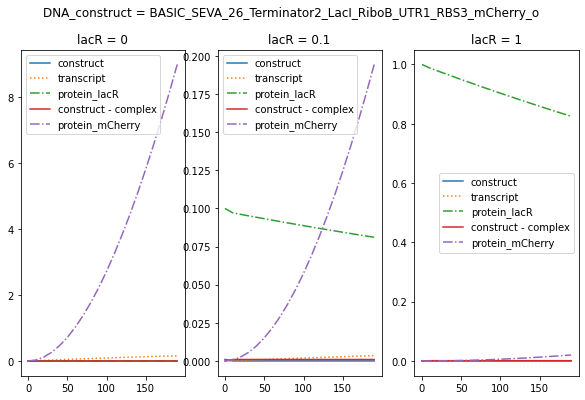

In [5]:
timepoints = np.arange(0, 200, 10)

cl = biocrnpyler_constructs[1]
print(cl)
construct = DNA_construct(cl, circular = True)
print(construct)

M = SimpleTxTlDilutionMixture("simple model", components = [construct], parameter_file = "default_parameters.txt")
CRN = M.compile_crn()

initial_concentration = {construct.get_species(): backbone_concentration(construct.get_species())}


print(CRN.pretty_print(show_rates = False))
plt.figure(figsize = (10, 6))
plt.suptitle(str(construct))
for ind, lacR0 in enumerate([0, .1, 1]):
    initial_concentration["protein_lacR"] = lacR0
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = initial_concentration)
    
    plt.subplot(130+ind+1)
    plt.title("lacR = "+str(lacR0))
    
    for s in CRN.species:
        if s == construct.get_species():
            label = "construct"
            ls = "-"
        elif "rna" in str(s):
            label = "transcript"
            ls = ":"
        elif "ordered_polymer" in str(s) and "dna" in str(s):
            label = "construct - complex"
            ls = "-"
        else:
            label = str(s)
            ls = "-."
        plt.plot(timepoints, R[str(s)], ls, label = label)
    plt.legend()

C:\Users\wp_ix\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[BASIC_SEVA_36, Terminator1, J23101_RiboA, UTR1_RBS2, sfGFP, UTR2_RBS1, mTagBFP2, UTR3_RBS1, mCherry]
DNA_construct = BASIC_SEVA_36_Terminator1_J23101_RiboA_UTR1_RBS2_sfGFP_UTR2_RBS1_mTagBFP2_UTR3_RBS1_mCherry_o dna_dna_BASIC_SEVA_36_forward_dna_Terminator1_forward_dna_J23101_RiboA_forward_dna_UTR1_RBS2_forward_dna_sfGFP_forward_dna_UTR2_RBS1_forward_dna_mTagBFP2_forward_dna_UTR3_RBS1_forward_dna_mCherry_forward_circular_
Species(N = 5) = {
protein[sfGFP] (@ 0),  rna[rna[UTR1_RBS2-forward]:rna[sfGFP-forward]:rna[UTR2_RBS1-forward]:rna[mTagBFP2-forward]:rna[UTR3_RBS1-forward]:rna[mCherry-forward]:rna[BASIC_SEVA_36-forward]:rna[Terminator1-forward]] (@ 0),  protein[mCherry] (@ 0),  dna[dna[BASIC_SEVA_36-forward]:dna[Terminator1-forward]:dna[J23101_RiboA-forward]:dna[UTR1_RBS2-forward]:dna[sfGFP-forward]:dna[UTR2_RBS1-forward]:dna[mTagBFP2-forward]:dna[UTR3_RBS1-forward]:dna[mCherry-forward](circular)] (@ 0),  protein[BFP2] (@ 0),  
}

Reactions (9) = [
0. dna[dna[BASIC_SEVA_36-forward]:d

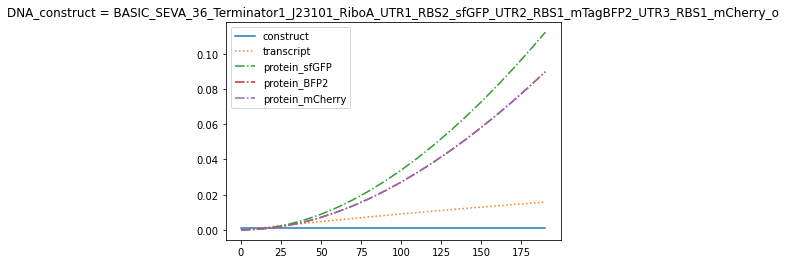

In [6]:
timepoints = np.arange(0, 200, 10)

cl = biocrnpyler_constructs[2]
print(cl)
construct = DNA_construct(cl, circular = True)
print(construct, construct.get_species())

M = SimpleTxTlDilutionMixture("simple model", components = [construct], parameter_file = "default_parameters.txt")
CRN = M.compile_crn()

initial_concentration = {construct.get_species(): backbone_concentration(construct.get_species())}
R = CRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = initial_concentration)

print(CRN.pretty_print(show_rates = False))
plt.figure()
plt.title(str(construct))
for s in CRN.species:
    if s == construct.get_species():
        label = "construct"
        ls = "-"
    elif "rna" in str(s):
        label = "transcript"
        ls = ":"
    elif "ordered_polymer" in str(s) and "dna" in str(s):
        label = "construct - complex"
        ls = "-"
    else:
        label = str(s)
        ls = "-."
    plt.plot(timepoints, R[str(s)],ls, label = label)
plt.legend()

C:\Users\wp_ix\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[BASIC_SEVA_26, Terminator1, TetR_RiboA, UTR1_RBS2, LacI, UTR2_RBS2, sfGFP, Terminator2, LacI_RiboB, UTR3_RBS2, TetR]
DNA_construct = BASIC_SEVA_26_Terminator1_TetR_RiboA_UTR1_RBS2_LacI_UTR2_RBS2_sfGFP_Terminator2_LacI_RiboB_UTR3_RBS2_TetR_o
Species(N = 9) = {
protein[tetR] (@ 0),  protein[sfGFP] (@ 0),  rna[rna[UTR3_RBS2-forward]:rna[TetR-forward]:rna[BASIC_SEVA_26-forward]:rna[Terminator1-forward]] (@ 0),  rna[rna[UTR1_RBS2-forward]:rna[LacI-forward]:rna[UTR2_RBS2-forward]:rna[sfGFP-forward]:rna[Terminator2-forward]] (@ 0),  protein[lacR] (@ 0),  dna[dna[BASIC_SEVA_26-forward]:dna[Terminator1-forward]:dna[TetR_RiboA-forward]:dna[UTR1_RBS2-forward]:dna[LacI-forward]:dna[UTR2_RBS2-forward]:dna[sfGFP-forward]:dna[Terminator2-forward]:dna[LacI_RiboB-forward]:dna[UTR3_RBS2-forward]:dna[TetR-forward](circular)] (@ 0),  ordered_polymer[dna[BASIC_SEVA_26-forward]:dna[Terminator1-forward]:dna[TetR_RiboA-forward]:dna[UTR1_RBS2-forward]:dna[LacI-forward]:dna[UTR2_RBS2-forward]:dna[sfGFP-forward

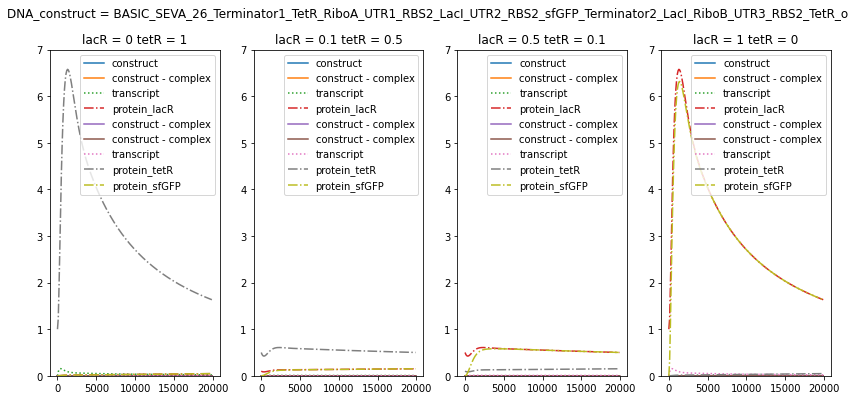

In [11]:
timepoints = np.arange(0, 20000, 100)

cl = biocrnpyler_constructs[3]
print(cl)
construct = DNA_construct(cl, circular = True)
print(construct)

M = SimpleTxTlDilutionMixture("simple model", components = [construct], parameter_file = "default_parameters.txt")
CRN = M.compile_crn()

initial_concentration = {construct.get_species(): backbone_concentration(construct.get_species())}
R = CRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = initial_concentration)

print(CRN.pretty_print(show_rates = True))
plt.figure(figsize = (14, 6))
plt.suptitle(str(construct))

conc_list = [0, .1, .5, 1]
for ind in range(len(conc_list)):
    lacR0 = conc_list[ind]
    tetR0 = conc_list[-(1+ind)]
    
    initial_concentration["protein_lacR"] = lacR0
    initial_concentration["protein_tetR"] = tetR0
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = initial_concentration)
    
    plt.subplot(140+ind+1)
    plt.title("lacR = "+str(lacR0)+" tetR = "+str(tetR0))
    
    for s in CRN.species:
        if s == construct.get_species():
            label = "construct"
            ls = "-"
        elif "rna" in str(s):
            label = "transcript"
            ls = ":"
        elif "ordered_polymer" in str(s) and "dna" in str(s):
            label = "construct - complex"
            ls = "-"
        else:
            label = str(s)
            ls = "-."
        plt.plot(timepoints, R[str(s)], ls, label = label)
        plt.ylim(0, 7)
    plt.legend()

[Terminator1, J23104_RiboA, UTR2_RBS1, mTagBFP2, UTR3_RBS3, mCherry, UTR1_RBS3, sfGFP]
DNA_construct = Terminator1_J23104_RiboA_UTR2_RBS1_mTagBFP2_UTR3_RBS3_mCherry_UTR1_RBS3_sfGFP_o
Species(N = 5) = {
protein[sfGFP] (@ 0),  rna[rna[UTR2_RBS1-forward]:rna[mTagBFP2-forward]:rna[UTR3_RBS3-forward]:rna[mCherry-forward]:rna[UTR1_RBS3-forward]:rna[sfGFP-forward]:rna[Terminator1-forward]] (@ 0),  protein[mCherry] (@ 0),  dna[dna[Terminator1-forward]:dna[J23104_RiboA-forward]:dna[UTR2_RBS1-forward]:dna[mTagBFP2-forward]:dna[UTR3_RBS3-forward]:dna[mCherry-forward]:dna[UTR1_RBS3-forward]:dna[sfGFP-forward](circular)] (@ 0),  protein[BFP2] (@ 0),  
}

Reactions (9) = [
0. dna[dna[Terminator1-forward]:dna[J23104_RiboA-forward]:dna[UTR2_RBS1-forward]:dna[mTagBFP2-forward]:dna[UTR3_RBS3-forward]:dna[mCherry-forward]:dna[UTR1_RBS3-forward]:dna[sfGFP-forward](circular)] --> dna[dna[Terminator1-forward]:dna[J23104_RiboA-forward]:dna[UTR2_RBS1-forward]:dna[mTagBFP2-forward]:dna[UTR3_RBS3-forward]:dna[m

C:\Users\wp_ix\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


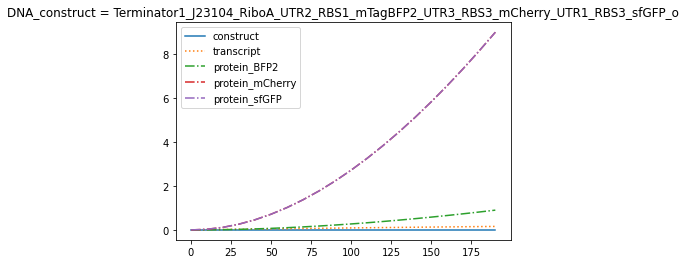

In [8]:
timepoints = np.arange(0, 200, 10)

cl = biocrnpyler_constructs[4]
print(cl)
construct = DNA_construct(cl, circular = True)
print(construct)

M = SimpleTxTlDilutionMixture("simple model", components = [construct], parameter_file = "default_parameters.txt")
CRN = M.compile_crn()

initial_concentration = {construct.get_species(): backbone_concentration(construct.get_species())}
R = CRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = initial_concentration)

print(CRN.pretty_print(show_rates = True))
plt.figure()
plt.title(str(construct))
for s in CRN.species:
    if s == construct.get_species():
        label = "construct"
        ls = "-"
    elif "rna" in str(s):
        label = "transcript"
        ls = ":"
    elif "ordered_polymer" in str(s) and "dna" in str(s):
        label = "construct - complex"
        ls = "-"
    else:
        label = str(s)
        ls = "-."
    plt.plot(timepoints, R[str(s)], ls, label = label)
plt.legend()